読み込んだrentalhousev49_bom.csvは、2月17日に用意した元データ(rental_house_base.csv)に、以下の処理を施したもの。

家賃が200000以下のものを残し、それ以外を削除した。

以下を削除した。(区名、最寄駅徒歩分数、最寄路線名、駅名、路線名、方角、所在階数字、駐車場、周辺環境。)

間取りを、部屋数、L,D,Kに分解して二値化した。間取り自体は削除した。Sは相関係数が低かったので削除した。

バストイレに関するデータ（シャワー～共同バス）のうち、賃料と相関が高いもの6つ中いくつあるかを、バストイレランクとしてまとめた。
（相関係数0.4以上、具体的には以下。温水洗浄便座、洗面台独立、脱衣所、追焚機能、浴室乾燥機、バス・トイレ別。）
その後、バストイレランク以外の全てを削除した。

キッチンに関するデータ（IHコンロ～冷蔵庫あり）のうち、賃料と相関が高いもの3つ中いくつあるか、逆相関が高いものがいくつあるかを、キッチンランクとしてまとめた。
（相関係数0.3以上、具体的には以下。コンロ3口、システムキッチン、カウンターキッチン。逆相関-0.28、コンロ1口。）
その後、キッチンランク以外の全てを削除した。

通信に関するデータ（BSアンテナ～高速インターネット）のうち、賃料と相関が高いのはBSアンテナ、CSアンテナだけだった。
BSアンテナとCSアンテナの相関係数は0.7だったので、BSアンテナのみを残し、CSアンテナ、およびそれ以外の通信に関するデータを削除した。

設備に関するデータ（24時間換気～バリアフリー）のうち、賃料と相関が高いもの6つ中いくつあるかを、設備ランクとしてまとめた。
（相関係数0.2以上、具体的には以下。24時間換気システム、床暖房、室内洗濯機置場、タイル張り、ウォークインクローゼット、シューズボックス、バルコニー、敷地内ごみ置き場。）
エレベーターだけは相関係数0.44と高かったので、他の設備とは独立させて残した。

建物構造のうち、賃料との相関が高かったRC（鉄筋コンクリート）（0.35）、逆相関が高かった木造（-0.33）を残して二値化し、それ以外を削除した。

In [1]:
import os
import pandas as pd
import numpy as np

df = pd.read_csv('./rentalhousev49_bom.csv')

In [2]:
df.head(100)

,id,賃料,区名,最寄駅徒歩分数,部屋数,L,D,K,S,築総月数,面積数字,何階建数字,バストイレランク,キッチンランク,BSアンテナ,エレベーター,設備ランク,RC（鉄筋コンクリート）,木造
0,1,75000,北区,4,1,0,0,1,0,117,20.01,12,3,1,1,1,4,1,0
1,2,76000,中央区,5,1,0,0,0,0,538,16.50,10,1,1,0,1,5,0,0
2,3,110000,渋谷区,6,1,0,0,1,0,102,22.05,15,5,1,1,1,6,1,0
3,4,150000,杉並区,3,2,1,1,1,0,352,60.48,4,3,0,0,1,3,1,0
4,5,74000,葛飾区,5,2,0,1,1,0,379,39.66,2,2,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,103,182000,港区,13,1,1,1,1,0,0,41.33,4,3,1,1,0,3,1,0
96,104,95000,台東区,10,1,0,0,1,0,3,25.44,11,5,1,1,1,5,1,0
97,105,78000,葛飾区,17,1,0,0,1,0,166,31.68,3,5,1,1,0,6,0,0
98,106,103000,杉並区,19,2,0,0,1,0,332,35.00,2,1,0,0,0,2,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28613 entries, 0 to 28612
Data columns (total 19 columns):
id              28613 non-null int64
賃料              28613 non-null int64
区名              28613 non-null object
最寄駅徒歩分数         28613 non-null int64
部屋数             28613 non-null int64
L               28613 non-null int64
D               28613 non-null int64
K               28613 non-null int64
S               28613 non-null int64
築総月数            28613 non-null int64
面積数字            28613 non-null float64
何階建数字           28613 non-null int64
バストイレランク        28613 non-null int64
キッチンランク         28613 non-null int64
BSアンテナ          28613 non-null int64
エレベーター          28613 non-null int64
設備ランク           28613 non-null int64
RC（鉄筋コンクリート）    28613 non-null int64
木造              28613 non-null int64
dtypes: float64(1), int64(17), object(1)
memory usage: 4.1+ MB


In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 610)
#df

In [5]:
#df.corr()

In [6]:
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.corr()

#plt.figure(figsize=(100, 80))
#sns.heatmap(df_corr, vmax=1, vmin=-1, center=0, cmap='bwr')

In [8]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [9]:
#df = pd.get_dummies(df, columns=['区名'])

In [10]:
#df = df.drop(['最寄路線名', '最寄駅名', '方角', '駐車場', '周辺環境', '契約期間', 'BSアンテナ', '間取り'], axis=1)

In [11]:
df = df.drop(['区名'], axis=1)

In [12]:
df

,id,賃料,最寄駅徒歩分数,部屋数,L,D,K,S,築総月数,面積数字,何階建数字,バストイレランク,キッチンランク,BSアンテナ,エレベーター,設備ランク,RC（鉄筋コンクリート）,木造
0,1,75000,4,1,0,0,1,0,117,20.01,12,3,1,1,1,4,1,0
1,2,76000,5,1,0,0,0,0,538,16.50,10,1,1,0,1,5,0,0
2,3,110000,6,1,0,0,1,0,102,22.05,15,5,1,1,1,6,1,0
3,4,150000,3,2,1,1,1,0,352,60.48,4,3,0,0,1,3,1,0
4,5,74000,5,2,0,1,1,0,379,39.66,2,2,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28608,31466,80000,7,2,0,1,1,0,360,37.90,3,3,0,0,0,2,0,0
28609,31467,54500,4,1,0,0,0,0,475,12.04,4,0,-1,0,0,2,1,0
28610,31468,125000,5,3,0,1,1,0,550,60.00,5,3,0,0,0,3,0,0
28611,31469,98000,4,1,0,1,1,0,132,29.59,2,2,1,0,0,4,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28613 entries, 0 to 28612
Data columns (total 18 columns):
id              28613 non-null int64
賃料              28613 non-null int64
最寄駅徒歩分数         28613 non-null int64
部屋数             28613 non-null int64
L               28613 non-null int64
D               28613 non-null int64
K               28613 non-null int64
S               28613 non-null int64
築総月数            28613 non-null int64
面積数字            28613 non-null float64
何階建数字           28613 non-null int64
バストイレランク        28613 non-null int64
キッチンランク         28613 non-null int64
BSアンテナ          28613 non-null int64
エレベーター          28613 non-null int64
設備ランク           28613 non-null int64
RC（鉄筋コンクリート）    28613 non-null int64
木造              28613 non-null int64
dtypes: float64(1), int64(17)
memory usage: 3.9 MB


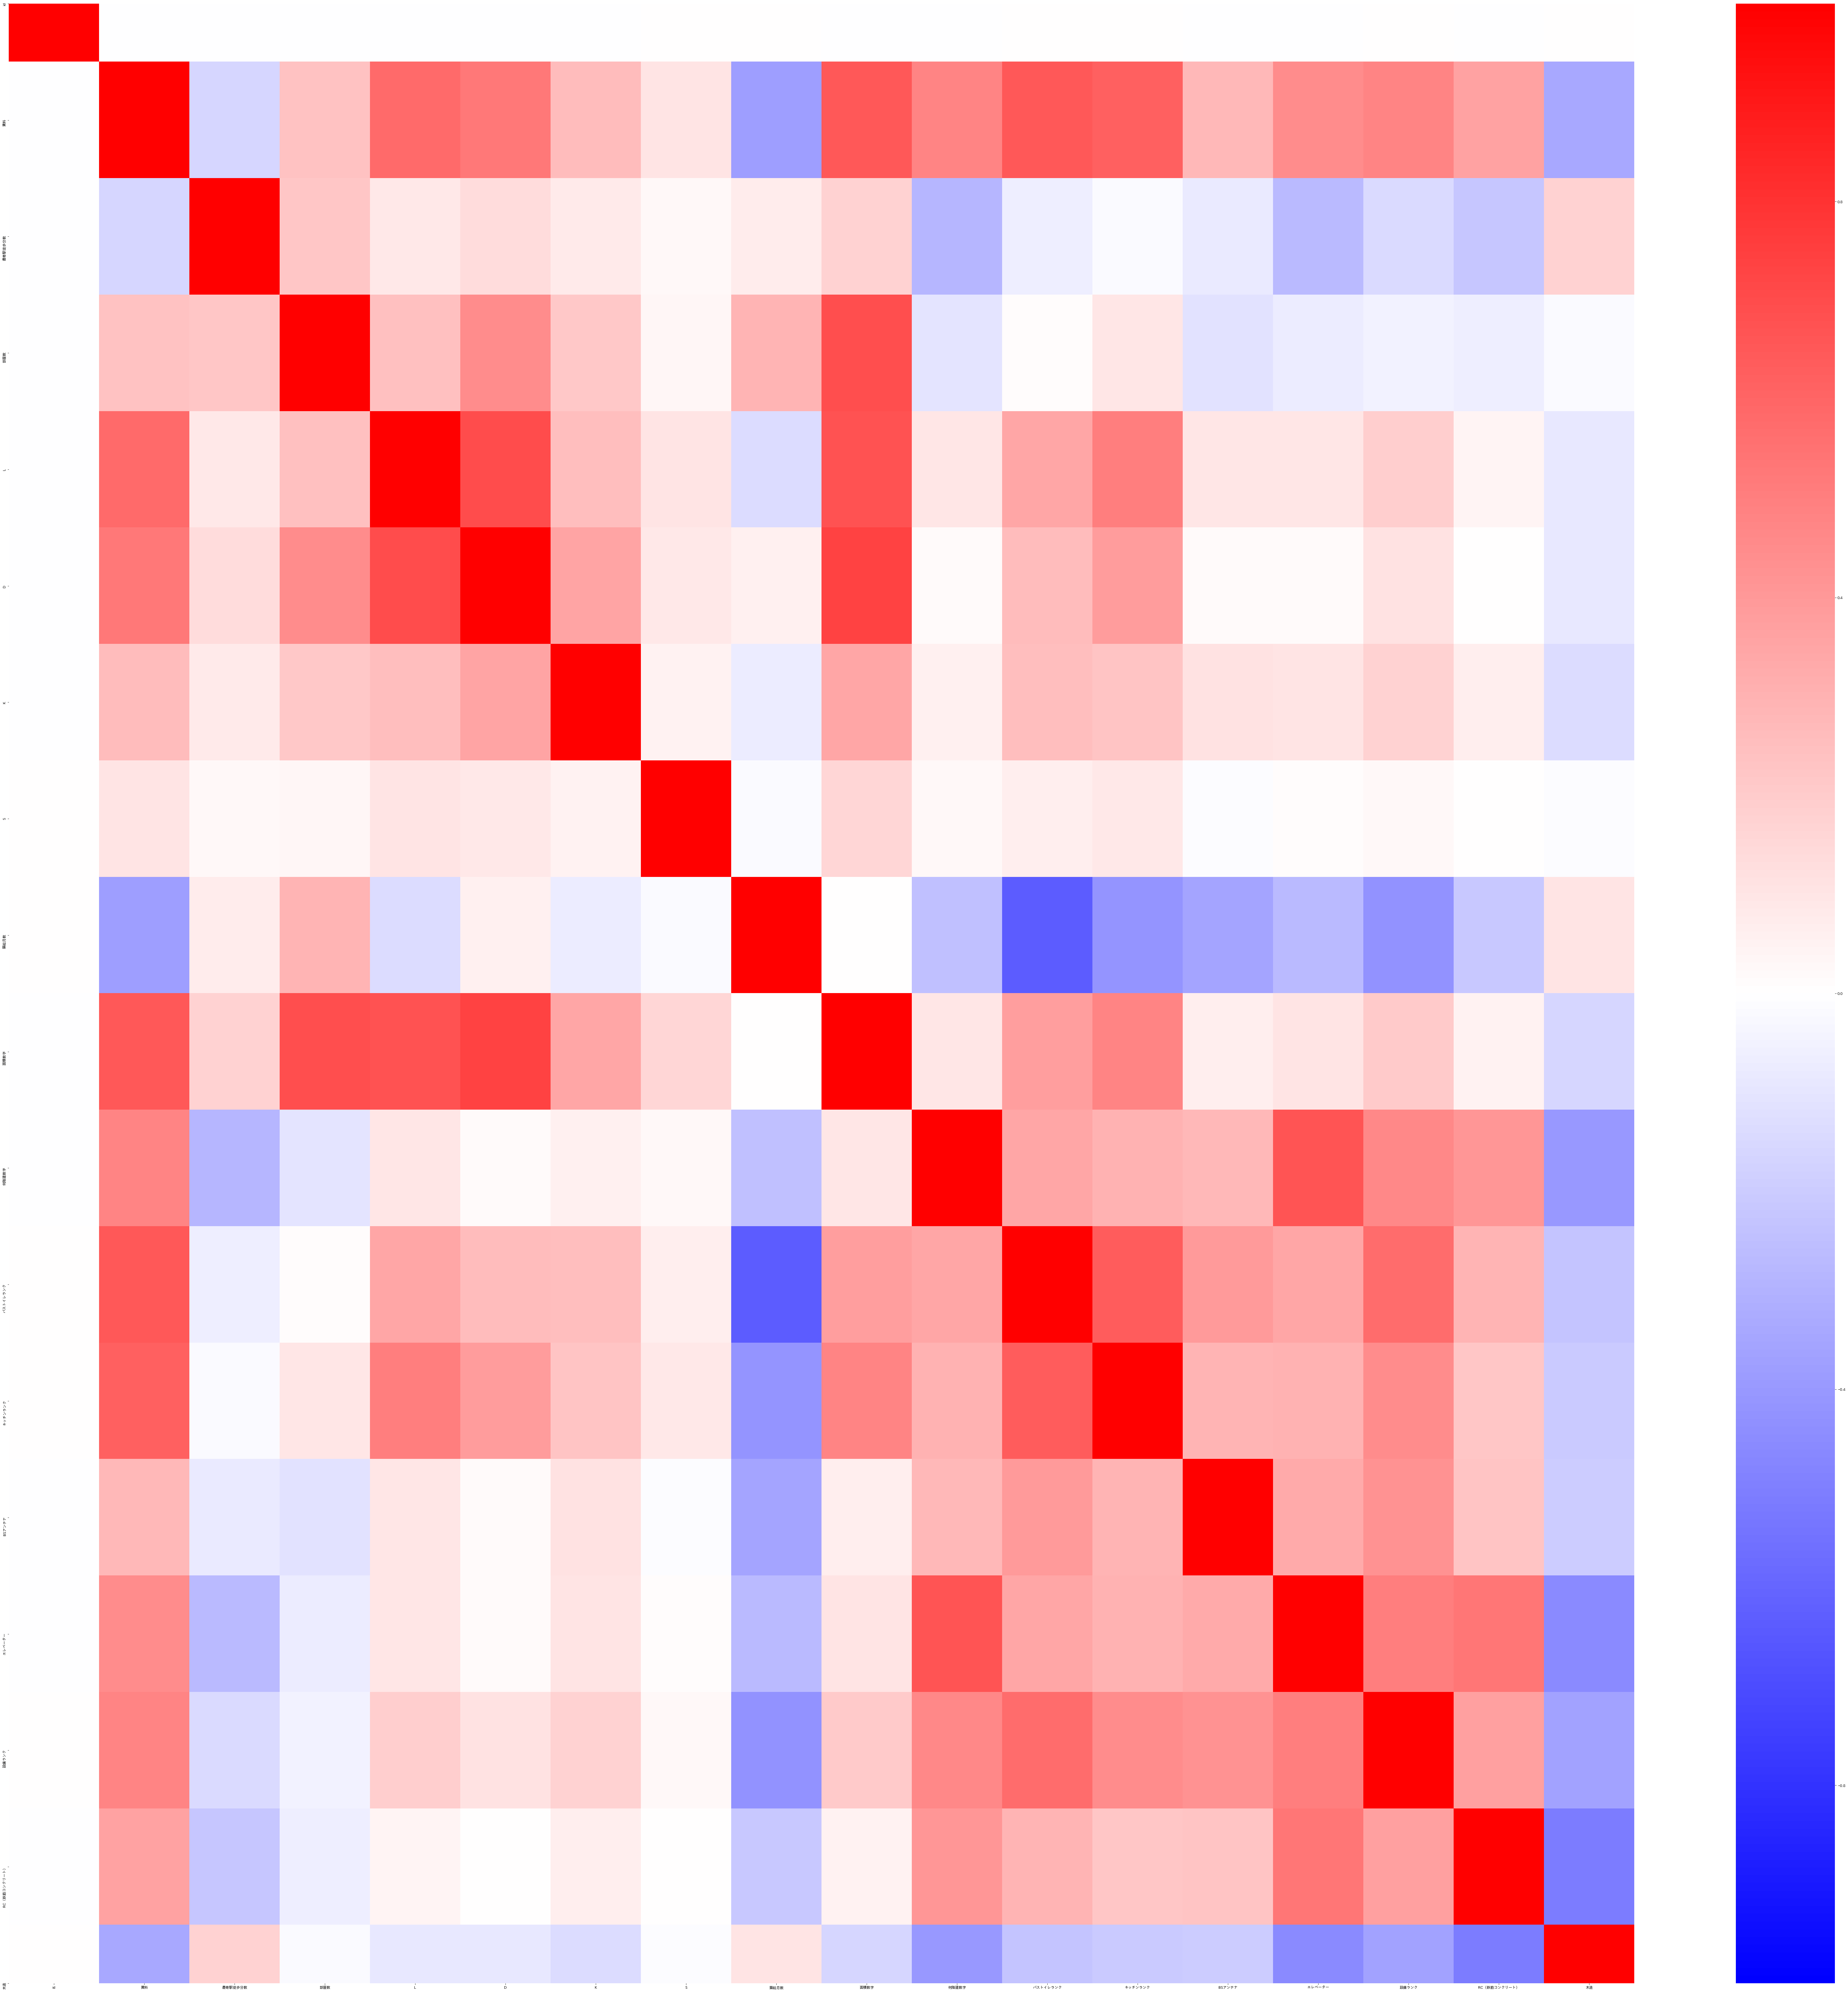

In [14]:
df_corr = df.corr()

plt.figure(figsize=(100, 100))
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0, cmap='bwr')

In [15]:
df

,id,賃料,最寄駅徒歩分数,部屋数,L,D,K,S,築総月数,面積数字,何階建数字,バストイレランク,キッチンランク,BSアンテナ,エレベーター,設備ランク,RC（鉄筋コンクリート）,木造
0,1,75000,4,1,0,0,1,0,117,20.01,12,3,1,1,1,4,1,0
1,2,76000,5,1,0,0,0,0,538,16.50,10,1,1,0,1,5,0,0
2,3,110000,6,1,0,0,1,0,102,22.05,15,5,1,1,1,6,1,0
3,4,150000,3,2,1,1,1,0,352,60.48,4,3,0,0,1,3,1,0
4,5,74000,5,2,0,1,1,0,379,39.66,2,2,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28608,31466,80000,7,2,0,1,1,0,360,37.90,3,3,0,0,0,2,0,0
28609,31467,54500,4,1,0,0,0,0,475,12.04,4,0,-1,0,0,2,1,0
28610,31468,125000,5,3,0,1,1,0,550,60.00,5,3,0,0,0,3,0,0
28611,31469,98000,4,1,0,1,1,0,132,29.59,2,2,1,0,0,4,0,1


データを、学習用train（この後、モデル作成のための学習用model_trainとモデル評価用model_testに分ける）と予測用predict（賃料未知のデータということにしておく）に分割

In [16]:
# 評価用データとして元データからランダムに300件を抽出
df_predict = df.sample(n=300, random_state=0)

In [17]:
# 学習用データは元データから評価用データを除いたもの
df_train = df[~df['id'].isin(df_predict['id'])]

In [18]:
# df_xxx_xは目的変数を除去したデータ
df_train_x = df_train.drop(['賃料'], axis=1)

In [19]:
# df_xxx_yは目的変数のみのデータ
df_train_y = df_train['賃料']

In [20]:
# df_xxx_xは目的変数を除去したデータ
df_predict_x = df_predict.drop(['賃料'], axis=1)

In [21]:
# df_xxx_yは目的変数のみのデータ
df_predict_y = df_predict['賃料']

In [22]:
# idだけ保持しておく
df_train_team_x = df_train['id']
df_predict_team_x = df_predict['id']

idデータの消去

In [23]:
df_train_x = df_train_x.drop(['id'], axis=1)

In [24]:
df_predict_x = df_predict_x.drop(['id'], axis=1)

In [25]:
df_train_x.head()

,最寄駅徒歩分数,部屋数,L,D,K,S,築総月数,面積数字,何階建数字,バストイレランク,キッチンランク,BSアンテナ,エレベーター,設備ランク,RC（鉄筋コンクリート）,木造
0,4,1,0,0,1,0,117,20.01,12,3,1,1,1,4,1,0
1,5,1,0,0,0,0,538,16.50,10,1,1,0,1,5,0,0
2,6,1,0,0,1,0,102,22.05,15,5,1,1,1,6,1,0
3,3,2,1,1,1,0,352,60.48,4,3,0,0,1,3,1,0
4,5,2,0,1,1,0,379,39.66,2,2,0,0,0,2,0,1


標準化する

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
#学習用データ
x_sc_df = StandardScaler()

#元データから平均と分散の算出
x_sc_df.fit(df_train_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
#元データを標準化
df_train_x_std = x_sc_df.transform(df_train_x)

In [29]:
#予測用データ
x_sc_df = StandardScaler()

#元データから平均と分析の算出
x_sc_df.fit(df_predict_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
#元データを標準化
df_predict_x_std = x_sc_df.transform(df_predict_x)

In [31]:
df_predict_x_std

array([[-0.43167919, -0.44956319, -0.54139029, ...,  0.64166363,
         0.85096294, -0.4843221 ],
       [ 0.76300492, -0.44956319, -0.54139029, ...,  0.64166363,
         0.85096294, -0.4843221 ],
       [ 0.76300492, -0.44956319, -0.54139029, ...,  0.64166363,
         0.85096294, -0.4843221 ],
       ...,
       [-0.19274237, -0.44956319, -0.54139029, ..., -2.18090366,
         0.85096294, -0.4843221 ],
       [-0.19274237, -0.44956319,  1.84709629, ..., -1.6163902 ,
        -1.1751393 , -0.4843221 ],
       [-0.19274237, -0.44956319, -0.54139029, ...,  0.64166363,
         0.85096294, -0.4843221 ]])

In [32]:
#目的変数は一行だけなので、公式に当てはめて計算
df_train_y_std = (df_train_y - df_train_y.mean()) / df_train_y.std()
df_predict_y_std = (df_predict_y - df_predict_y.mean()) / df_predict_y.std()

重回帰分析のためのモデル作成

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
from sklearn.model_selection import train_test_split
linreg = LinearRegression()

In [35]:
#線形回帰モデルへ当てはめ
linreg.fit(df_train_x_std, df_train_y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
df_train_x_std

array([[-0.71470467, -0.45710197, -0.54201132, ...,  0.14859101,
         0.92414126, -0.47499257],
       [-0.49223215, -0.45710197, -0.54201132, ...,  0.71512173,
        -1.08208566, -0.47499257],
       [-0.26975962, -0.45710197, -0.54201132, ...,  1.28165246,
         0.92414126, -0.47499257],
       ...,
       [-0.49223215,  3.37017233, -0.54201132, ..., -0.41793972,
        -1.08208566, -0.47499257],
       [-0.71470467, -0.45710197, -0.54201132, ...,  0.14859101,
        -1.08208566,  2.1052961 ],
       [-0.49223215, -0.45710197, -0.54201132, ..., -1.55100117,
        -1.08208566, -0.47499257]])

In [37]:
df_train_y_std

0       -0.752880
1       -0.725438
2        0.207578
3        1.305244
4       -0.780321
           ...   
28608   -0.615671
28609   -1.315434
28610    0.619203
28611   -0.121722
28612   -0.588230
Name: 賃料, Length: 28313, dtype: float64

In [38]:
test_result = linreg.predict(df_train_x_std)

In [39]:
# 予測結果を逆標準化
# 予測値
y_test_data_predict = test_result * df_train_y.std() + df_train_y.mean()
# 正解
y_pred_val = df_train_y_std * df_train_y.std() + df_train_y.mean()

In [40]:
pip install japanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


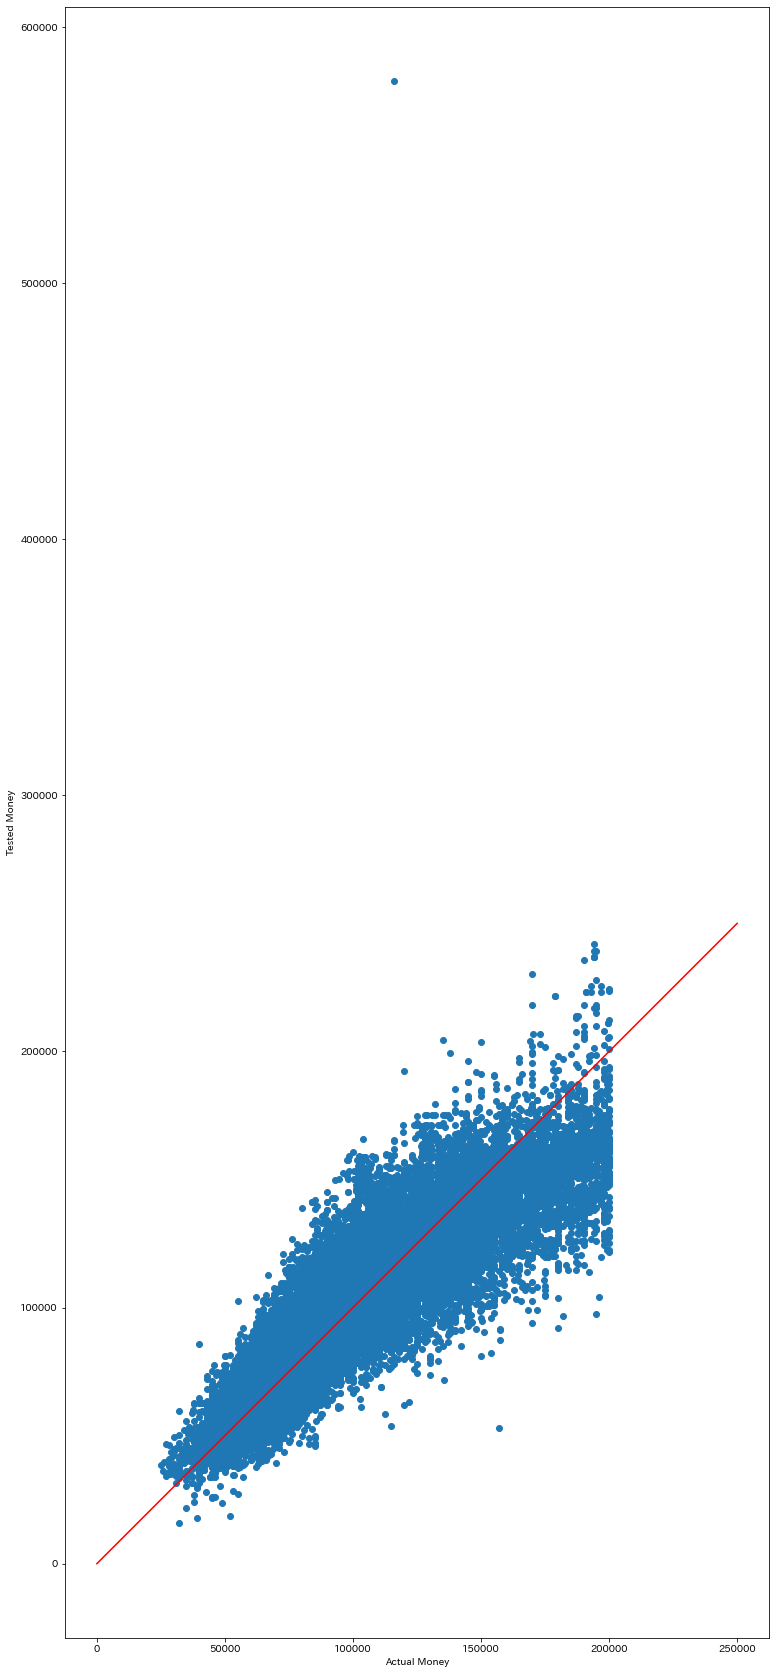

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,30))
plt.scatter(y_pred_val, y_test_data_predict)
plt.xlabel("Actual Money")
plt.ylabel("Tested Money")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 250000)
y=x
plt.plot(x,y,color="red")

In [42]:
rmse = np.sqrt(sum((y_pred_val - y_test_data_predict) ** 2) / len(y_pred_val))
print("RMSE = ", rmse)

RMSE =  17519.872189953094


In [43]:
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'

設備ランク          -0.000743
S              -0.003704
木造             -0.011013
BSアンテナ         -0.011141
K              -0.029270
部屋数            -0.048226
エレベーター          0.060711
キッチンランク         0.063464
RC（鉄筋コンクリート）    0.093197
L               0.100006
D               0.112328
築総月数           -0.133612
最寄駅徒歩分数        -0.136217
バストイレランク        0.177964
何階建数字           0.189421
面積数字            0.445057
Name: Coef, dtype: float64

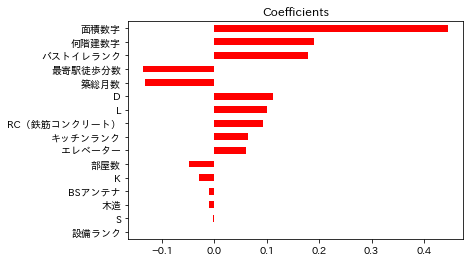

In [44]:
coef_df = pd.DataFrame({"Coef":linreg.coef_, "Coef_abs":np.abs(linreg.coef_)})
coef_df.index = df_train_x.columns
coef_df= coef_df.sort_values(by="Coef_abs")
coef_df["Coef"].tail(40).plot(kind="barh", title="Coefficients", color="red")
coef_df["Coef"].tail(40)

In [45]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Users\\yk13525\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [46]:
import matplotlib as mpl
mpl.get_configdir()

'C:\\Users\\yk13525\\.matplotlib'

#学習データと予測データに分割(学習データ:予測データ=7:3)
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(df_train_x_std, df_train_y_std, test_size=0.3)

print(x_train_data)

#線形回帰モデルへ当てはめ
linreg.fit(x_train_data, y_train_data)

#予測実行
test_result = linreg.predict(x_test_data)

# 予測結果を逆標準化
# 予測値
y_test_data_predict = test_result * df_train_y.std() + df_train_y.mean()
# 正解
y_pred_val = y_test_data * df_train_y.std() + df_train_y.mean()

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(y_pred_val, y_test_data_predict)
plt.xlabel("Actual Money")
plt.ylabel("Tested Money")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 1000)
y=x
plt.plot(x,y,color="red")

rmse = np.sqrt(sum((y_pred_val - y_test_data_predict) ** 2) / len(y_pred_val))
print("RMSE = ", rmse)

coef_df = pd.DataFrame({"Coef":linreg.coef_, "Coef_abs":np.abs(linreg.coef_)})
coef_df.index = df_train_x.columns
coef_df= coef_df.sort_values(by="Coef_abs")
coef_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_df["Coef"].tail(20)

linreg_all = LinearRegression()

linreg_all.fit(df_train_x_std,df_train_y_std)

y_predict_result = linreg_all.predict(df_predict_x_std)

coef_all_df = pd.DataFrame({"Coef":linreg_all.coef_, "Coef_abs":np.abs(linreg_all.coef_)})
coef_all_df.index = df_predict_x.columns
coef_all_df = coef_all_df.sort_values(by="Coef_abs")
coef_all_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_all_df["Coef"].tail(20)

# 予測結果を逆標準化
df_predict_y.predict = y_predict_result * df_predict_y.std() + df_predict_y.mean()
y_predict_result_val = df_predict_y

plt.figure(figsize=(10,10))
plt.scatter(y_predict_result_val, df_predict_y.predict)
plt.xlabel("Actual Ratio")
plt.ylabel("Predicted Ratio")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 2)
y=x
plt.plot(x,y,color="red")

rmse = np.sqrt(sum((y_predict_result_val - df_predict_y.predict) ** 2) / len(y_predict_result_val))
print("RMSE = ", rmse)